## Exploring eBay Car Sales Data

In this guided project  we'll work with a dataset of used cars from eBay Kleinanzeigen,a classifieds section of the German eBay website. The aim of this project is to clean the data and analyze the included used car listings.


#### DESCRIPTION
Over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen.

##### SUMMARY
The content of the data is in german, so one has to translate it first if one can not speak german. Those fields are included:

- dateCrawled : when this ad was first crawled, all field-values are taken from this date
- name : "name" of the car
- seller : private or dealer
- offerType
- price : the price on the ad to sell the car
- abtest
- vehicleType
- yearOfRegistration : at which year the car was first registered
- gearbox
- powerPS : power of the car in PS
- model
- kilometer : how many kilometers the car has driven
- monthOfRegistration : at which month the car was first registered
- fuelType
- brand
- notRepairedDamage : if the car has a damage which is not repaired yet
- dateCreated : the date for which the ad at ebay was created
- nrOfPictures : number of pictures in the ad
- postalCode
- lastSeenOnline : when the crawler saw this ad last online

The fields lastSeen and dateCrawled could be used to estimate how long a car will be at least online before it is sold. Regression on average Price per Year based on this dataset Happy Coding!

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from csv import reader

In [3]:
autos = pd.read_csv("autos.csv", encoding='Latin-1') 

In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [5]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### Dataframe information 
- 50000 rows × 20 columns
- Columns titles are in camel case not snake case
- Some columns need to be changed into int Dtype


### Changing the column names from camel case to snake case 

In [6]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
new_cols = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'year_of_registration', 'gearbox', 'powerPS', 'model',
       'odometer_km', 'month_of_registration', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_of_pictures', 'postal_code',
       'last_seen']
autos.columns = new_cols

In [8]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,year_of_registration,gearbox,powerPS,model,odometer_km,month_of_registration,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Changing datetime format for multiple columns

Columns with data stored as object that needs to be changed to date format.
- Date_crawled
- ad_created
- last_seen


In [9]:
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   date_crawled           371528 non-null  object
 1   name                   371528 non-null  object
 2   seller                 371528 non-null  object
 3   offer_type             371528 non-null  object
 4   price                  371528 non-null  int64 
 5   ab_test                371528 non-null  object
 6   vehicle_type           333659 non-null  object
 7   year_of_registration   371528 non-null  int64 
 8   gearbox                351319 non-null  object
 9   powerPS                371528 non-null  int64 
 10  model                  351044 non-null  object
 11  odometer_km            371528 non-null  int64 
 12  month_of_registration  371528 non-null  int64 
 13  fuel_type              338142 non-null  object
 14  brand                  371528 non-null  object
 15  

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,year_of_registration,gearbox,powerPS,model,odometer_km,month_of_registration,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [10]:
#Changing cols dtype to date formate
autos['date_crawled'] = pd.to_datetime(autos['date_crawled'])
autos['ad_created'] = pd.to_datetime(autos['ad_created'])
autos['last_seen'] = pd.to_datetime(autos['last_seen'])


In [11]:
#changing the dtype into int from object
autos["price"] = autos["price"].astype(int)
autos["odometer_km"] = autos["odometer_km"].astype(int)


In [12]:
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date_crawled           371528 non-null  datetime64[ns]
 1   name                   371528 non-null  object        
 2   seller                 371528 non-null  object        
 3   offer_type             371528 non-null  object        
 4   price                  371528 non-null  int32         
 5   ab_test                371528 non-null  object        
 6   vehicle_type           333659 non-null  object        
 7   year_of_registration   371528 non-null  int64         
 8   gearbox                351319 non-null  object        
 9   powerPS                371528 non-null  int64         
 10  model                  351044 non-null  object        
 11  odometer_km            371528 non-null  int32         
 12  month_of_registration  371528 non-null  int6

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,year_of_registration,gearbox,powerPS,model,odometer_km,month_of_registration,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


## Investigating missing data 

In [13]:
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,year_of_registration,gearbox,powerPS,model,odometer_km,month_of_registration,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
first,2016-03-05 14:06:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-10 00:00:00,NaN,NaN,2016-03-05 14:15:08
last,2016-04-07 14:36:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-07 00:00:00,NaN,NaN,2016-04-07 14:58:51
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN


From the above we can see that all column have a majority county of 371528 with some being less. We'll need to re examine the columns to see how many NaN values there are.

    - vehicle_type	    [333659] missing -37869
    - gearbox	        [351319] missing -20209
    - model	            [351044] missing -20484
    - fuel_type	        [338142] missing -33386
    - unrepaired_damage	[299468] missing -72060


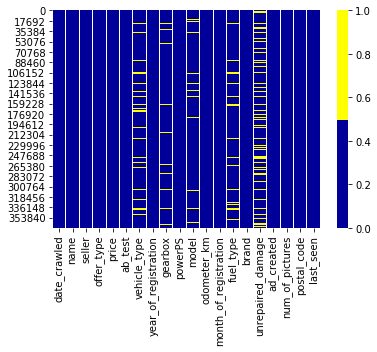

In [14]:
#Finding missing data via heat map
cols = autos.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(autos[cols].isnull(), cmap=sns.color_palette(colours))


The horizontal axis shows the column name, the vertical axis shows the number of rows; the yellow color represents the missing data while the blue color otherwise.

In [15]:
#showcasing missing values as percentage of total rows
for col in autos.columns:
    missing = np.mean(autos[col].isnull())
    missing_per = '{} - {}%'.format(col, round(missing*100))
    print(missing_per) 

date_crawled - 0.0%
name - 0.0%
seller - 0.0%
offer_type - 0.0%
price - 0.0%
ab_test - 0.0%
vehicle_type - 10.0%
year_of_registration - 0.0%
gearbox - 5.0%
powerPS - 0.0%
model - 6.0%
odometer_km - 0.0%
month_of_registration - 0.0%
fuel_type - 9.0%
brand - 0.0%
unrepaired_damage - 19.0%
ad_created - 0.0%
num_of_pictures - 0.0%
postal_code - 0.0%
last_seen - 0.0%


### The columns missing data are:

- unrepaired_damage - 19.0%
- vehicle_type - 10.0%
- fuel_type - 9.0%
- model - 6.0%
- gearbox - 5.0%

I have decided not to drop rows containing null values as it has not impacted the other categories, this most likely the cause of a seller not completing the description adequately for the car they are selling.

## Investigating outliers and irregular data

In [16]:
#naming the series 
price_series = autos["price"]
odometer_series = autos["odometer_km"]

#looking for outliers
#finding the range of prices
free_cars = autos[autos["price"] == 0]
cheap_cars = autos[autos['price'].between(0,50000)]
average_cars =  autos[autos['price'].between(50000,100000)]
expensive_cars = autos[autos["price"].between (100000,150000)]
very_expensive_cars = autos[autos["price"]>150000]


print('There are',len(free_cars),'free cars')
print('There are',len(cheap_cars), 'between €0 - €50,000')
print('There are',len(average_cars), 'between €50,000 - €100,000')
print('There are',len(expensive_cars),'between €100,000 - €150,000')
print('There are',len(very_expensive_cars),'more than €150,000')

#looking at the min and max for the price and odometer columns
print("\nThe most expensive car is €",price_series.max())
print("\nThe least expensive car is €", price_series.min())

print("The most mileage a car has is", odometer_series.max(), "km")
print("The least mileage a car has is", odometer_series.min(), "km")



There are 10778 free cars
There are 369966 between €0 - €50,000
There are 1179 between €50,000 - €100,000
There are 177 between €100,000 - €150,000
There are 232 more than €150,000

The most expensive car is € 2147483647

The least expensive car is € 0
The most mileage a car has is 150000 km
The least mileage a car has is 5000 km


In [17]:
#This shows us how many cars have the same amount of mileage
#For example, the first row tells us there are 32424 cars with an odometer of 150000
odometer_series.value_counts().sort_index(ascending=False)

150000    240797
125000     38067
100000     15920
90000      12523
80000      11053
70000       9773
60000       8669
50000       7615
40000       6376
30000       6041
20000       5676
10000       1949
5000        7069
Name: odometer_km, dtype: int64

- Interestingly there appears to be 10778 free cars listed on Ebay, upon further inspection this seems to be normal on German Ebay, people use the site to sell cars and also get rid of old cars that are broken and not worth much
- Therefore we can expel this as an outlier
- However, there are 232 cars more than €150,000. Below we've calculated how many of these 

In [18]:
price_series.value_counts().sort_index(ascending=False).head(20)

2147483647     1
99999999      15
99000000       1
74185296       1
32545461       1
27322222       1
14000500       1
12345678       9
11111111      10
10010011       1
10000000       8
9999999        3
3895000        1
3890000        1
2995000        1
2795000        1
1600000        2
1300000        1
1250000        2
1234566        1
Name: price, dtype: int64

In [19]:
pd.set_option("display.max_rows", None)
very_expensive_cars.sort_index(ascending=True)


,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,year_of_registration,gearbox,powerPS,model,odometer_km,month_of_registration,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
1846,2016-03-10 22:47:05,BMW_M1_Museumsfahrzeug_Neuwagenzustand_Glossy_...,privat,Angebot,579000,control,coupe,1980,manuell,277,andere,20000,12,benzin,bmw,nein,2016-03-10,0,60435,2016-03-23 10:45:27
4359,2016-03-27 23:48:22,Mercedes_Benz_SL_280,privat,Angebot,185000,test,cabrio,1971,automatik,170,sl,5000,7,benzin,mercedes_benz,nein,2016-03-27,0,92318,2016-04-06 02:15:21
10649,2016-04-05 09:36:18,Porsche_996_GT2_MK2_Clubsport,privat,Angebot,420000,control,coupe,2004,manuell,483,911,50000,4,benzin,porsche,nein,2016-04-05,0,81669,2016-04-07 12:15:38
13302,2016-03-20 21:49:18,Porsche_911_Targa_4_GTS,privat,Angebot,192500,test,cabrio,2015,automatik,430,911,5000,4,benzin,porsche,nein,2016-03-20,0,36043,2016-04-07 07:16:29
14065,2016-03-15 18:55:17,Porsche_991_GT3_Clubsport,privat,Angebot,178900,control,coupe,2015,automatik,476,911,10000,3,benzin,porsche,nein,2016-03-15,0,58644,2016-04-06 21:16:53
14663,2016-04-03 06:03:56,Tausch_moeglich_Polo_vw_n9,privat,Angebot,11111111,control,coupe,2003,manuell,64,polo,150000,2,benzin,volkswagen,NaN,2016-04-03,0,46535,2016-04-07 10:16:51
15335,2016-03-27 12:46:46,Porsche_911_Speedster_breit,privat,Angebot,189000,test,cabrio,1989,manuell,231,911,80000,6,benzin,porsche,nein,2016-03-27,0,82064,2016-04-07 08:16:12
16889,2016-03-15 16:45:45,Ford_Mondeo_Kombi_TÜV_abgelaufen,privat,Angebot,1000000,control,kombi,1998,NaN,0,mondeo,150000,0,benzin,ford,ja,2016-03-15,0,26607,2016-03-15 16:45:45
20143,2016-03-18 00:55:53,Porsche_911R_Einer_von_911,privat,Angebot,1250000,test,coupe,2016,manuell,500,911,5000,3,benzin,porsche,nein,2016-03-17,0,70435,2016-03-20 04:48:27
20746,2016-03-08 15:54:52,Golf3_Schlachtfest,privat,Angebot,12345678,test,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-08,0,18516,2016-03-17 16:15:43


- As we can see from the price columns it looks like some of these numbers have been entered by error
- Row 366653 shows car 'BMW_E36_Cabrio_tausch_gegen_ein_Opel_Insignia' priced at 99999999, the name the seller put up translates to 'BMW E36 convertible __swap for an Opel Insignia'__ so the seller isn't trying to sell the car but instead swap for another, therefore it's higly likely that they put the price in just to input a number to bypass the ebay requirements.

    - Because of this we're going to remove any cars with the price that has the same number repeated such as the above



In [20]:
autos = autos[autos.price != 2147483647 ]
autos = autos[autos.price != 99999999 ]
autos = autos[autos.price != 9999999 ]
autos = autos[autos.price != 11111111 ]
autos = autos[autos.price != 1111111 ]
autos = autos[autos.price != 12345678 ] 
autos = autos[autos.price != 999999]

In [21]:
price_series= autos['price']
price_series.value_counts().sort_index(ascending=False).head(20)

99000000    1
74185296    1
32545461    1
27322222    1
14000500    1
10010011    1
10000000    8
3895000     1
3890000     1
2995000     1
2795000     1
1600000     2
1300000     1
1250000     2
1234566     1
1010010     1
1000000     5
999990      1
911911      1
849000      1
Name: price, dtype: int64

- All rows with the price of repeated numbers have now been dropped from the dataframe

## Investigating year_of_registration outliers.

In [22]:
autos['year_of_registration'].describe()
#Here we can see that there is an incorrect entry as the min in the registration was 1000 and the max is 9999

count    371475.000000
mean       2004.560232
std          91.930376
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: year_of_registration, dtype: float64

- A car can't be first registered after the listing was seen, therefore any vehicle with a registration year above 2016 is definitely inaccurate
- Also the car with the earliest registration was 1000, this will be removed.


In [ ]:
#Let's count the number of listings with cars that fall outside the 1900 - 2016
autos_1900_1996 = autos['year_of_registration'].between(1900 , 2016)

#we can see from below that there 48028 that fall in between 1900-2016
#there are 1972 that fall outside of this 

In [26]:
autos = autos[autos["year_of_registration"].between(1906, 2016)]

In [27]:
autos.year_of_registration.value_counts(ascending=False)

2000    24543
1999    22765
2005    22316
2006    20228
2001    20215
2003    19870
2004    19746
2002    19188
1998    17950
2007    17673
2008    16175
2009    15605
1997    14704
2010    12354
2011    12068
1996    10882
2016     9859
1995     9653
2012     9418
2013     6157
1994     4872
2014     4802
1993     3469
1992     3047
2015     2981
1990     2851
1991     2810
1989     1342
1988      965
1985      786
1987      697
1980      628
1986      576
1983      454
1984      422
1970      370
1982      335
1979      312
1978      307
1981      283
1972      248
1960      212
1973      204
1974      200
1971      199
1977      193
1976      193
1966      160
1969      154
1975      152
1968      147
1967      141
1965      121
1910      104
1964       80
1963       77
1962       53
1961       51
1959       45
1958       34
1956       32
1957       27
1955       25
1950       22
1951       19
1953       17
1954       16
1937       13
1952       12
1938        8
1929        8
1936  

In [31]:
autos['year_of_registration'].sort_values(ascending=False).tail()

121793    1910
337642    1910
42039     1910
144865    1910
197953    1910
Name: year_of_registration, dtype: int64

## Conclusion
- Changed column names from camelCase to snake_case
- Changed incorrect columns dtypes, 
    - numeric calls from objects to int
    - date columns from object to datetime
- Investigated missing data
    - I decided agaisnt dropping the rows with missing data values because they still contained a significant amount of information about the car
- Investigating outliers and irregular data
    - Dropped rows with irregular prices info as it was discovered that users were inputting random numeric sequences to
    - Dropped rows with cars registered below 1906, as that was the first year any car in Germany was registered. 
